In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/Ava/Library/CloudStorage/OneDrive-Personal/Thesis/Commuting_data.csv", encoding = "ISO-8859-1")
data_county = data
data_ed = data 

In [3]:
total_num_people = data['COUNT'].sum()
total_num_people

2750239

In [4]:
data["RESIDENCE_COUNTY_LABEL"].unique()

array(['Carlow', 'Dublin City', 'South Dublin', 'Fingal',
       'Dún-Laoghaire Rathdown', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork City', 'Cork County', 'Kerry',
       'Limerick City and County', 'Tipperary',
       'Waterford City and County', 'Galway City', 'Galway County',
       'Leitrim', 'Mayo', 'Roscommon', 'Sligo', 'Cavan', 'Donegal',
       'Monaghan'], dtype=object)

In [5]:
data.loc[(data['RESIDENCE_COUNTY_LABEL'] == 'Kildare') & (data['RESIDENCE_CSOED_LABEL'] == 'Maynooth')].sort_values(by=['COUNT']).tail(20)


,RESIDENCE_ED_GUID,RESIDENCE_CSOED,RESIDENCE_CSOED_LABEL,RESIDENCE_COUNTY,RESIDENCE_COUNTY_LABEL,POWSC_ED_GUID,POWSC_CSOED,POWSC_CSOED_LABEL,POWSC_COUNTY,POWSC_COUNTY_LABEL,COUNT
75924,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE196291DB413A3E055000000000001,ed3409_02077,North Dock B,DC,Dublin City,70
76009,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE196291DE213A3E055000000000001,ed3409_03018,Newcastle,SD,South Dublin,71
76111,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE19629221213A3E055000000000001,ed3409_06038,Kilcock,KE,Kildare,76
76080,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE196291D1913A3E055000000000001,ed3409_05027,Clonskeagh-Belfield,DR,Dún-Laoghaire Rathdown,77
76065,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE196291CE813A3E055000000000001,ed3409_04041,The Ward,FL,Fingal,79
76011,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE196291DE413A3E055000000000001,ed3409_03020,Palmerston West,SD,South Dublin,82
76156,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE19629186313A3E055000000000001,ed3409_11014,Kilmore,MH,Meath,83
76102,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE19629225B13A3E055000000000001,ed3409_06003,Naas Urban,KE,Kildare,84
75977,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE196291DEC13A3E055000000000001,ed3409_02144,Royal Exchange A,DC,Dublin City,99
75923,2AE19629224013A3E055000000000001,ed3409_06040,Maynooth,KE,Kildare,2AE196291DB213A3E055000000000001,ed3409_02075,North City,DC,Dublin City,117


In [16]:
origins_county = data["RESIDENCE_COUNTY_LABEL"].unique()
destinations_county = data["POWSC_COUNTY_LABEL"].unique()

In [17]:
import itertools

# Generate permutations
permutations = list(itertools.product(origins_county, destinations_county))

# Create DataFrame
all_commutes_df = pd.DataFrame(permutations, columns=['County_Origin_all', 'County_Destination_all'])

# Create 'County_commute' column by concatenating 'Origin' and 'Destination' with '-'
all_commutes_df['County_commute'] = all_commutes_df['County_Origin_all'] + '-' + all_commutes_df['County_Destination_all']

# Create 'count' column with all 0s
all_commutes_df['Count_Zero'] = 0

all_commutes_df

,County_Origin_all,County_Destination_all,County_commute,Count_Zero
0,Carlow,Carlow,Carlow-Carlow,0
1,Carlow,Dublin City,Carlow-Dublin City,0
2,Carlow,South Dublin,Carlow-South Dublin,0
3,Carlow,Fingal,Carlow-Fingal,0
4,Carlow,Dún-Laoghaire Rathdown,Carlow-Dún-Laoghaire Rathdown,0
...,...,...,...,...
1080,Monaghan,Clare,Monaghan-Clare,0
1081,Monaghan,Sligo,Monaghan-Sligo,0
1082,Monaghan,Longford,Monaghan-Longford,0
1083,Monaghan,Donegal,Monaghan-Donegal,0


In [18]:
import pandas as pd

data_lat_long = {
    "county": ['Carlow', 'Dublin City', 'South Dublin', 'Fingal', 'Dún-Laoghaire Rathdown', 'Kildare', 'Kilkenny', 'Laois',
               'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford', 'Wicklow', 'Clare', 'Cork City', 'Cork County',
               'Kerry', 'Limerick City and County', 'Tipperary', 'Waterford City and County', 'Galway City', 'Galway County',
               'Leitrim', 'Mayo', 'Roscommon', 'Sligo', 'Cavan', 'Donegal', 'Monaghan'],
    "latitude": [52.7181, 53.3498, 53.2862, 53.5486, 53.2926, 53.1589, 52.6541, 52.9949, 53.7267, 53.9509, 53.6055, 53.2274,
                 53.5267, 52.3369, 52.975, 52.8077, 51.8969, 51.9943, 52.1545, 52.668, 52.4739, 52.2593, 53.2707, 53.2707,
                 54.1177, 53.8356, 53.6269, 54.2704, 53.9908, 54.6538, 54.2522],
    "longitude": [-6.8509, -6.2603, -6.3566, -6.1871, -6.1393, -6.9094, -7.2448, -7.3325, -7.8001, -6.6111, -6.6564, -7.7324,
                  -7.3389, -6.4633, -6.0498, -9.4218, -8.4863, -8.7287, -9.5669, -8.6305, -7.9221, -7.1101, -9.0568, -9.0568,
                  -8.0188, -9.2785, -8.2169, -8.4761, -7.36, -8.1096, -6.9695]
}

df = pd.DataFrame(data_lat_long)

# Adding Northern Ireland and Overseas with blank latitude and longitude
#df = df.append({'county': 'Northern Ireland', 'latitude': None, 'longitude': None}, ignore_index=True)
#df = df.append({'county': 'Overseas', 'latitude': None, 'longitude': None}, ignore_index=True)

print(df)

                       county  latitude  longitude
0                      Carlow   52.7181    -6.8509
1                 Dublin City   53.3498    -6.2603
2                South Dublin   53.2862    -6.3566
3                      Fingal   53.5486    -6.1871
4      Dún-Laoghaire Rathdown   53.2926    -6.1393
5                     Kildare   53.1589    -6.9094
6                    Kilkenny   52.6541    -7.2448
7                       Laois   52.9949    -7.3325
8                    Longford   53.7267    -7.8001
9                       Louth   53.9509    -6.6111
10                      Meath   53.6055    -6.6564
11                     Offaly   53.2274    -7.7324
12                  Westmeath   53.5267    -7.3389
13                    Wexford   52.3369    -6.4633
14                    Wicklow   52.9750    -6.0498
15                      Clare   52.8077    -9.4218
16                  Cork City   51.8969    -8.4863
17                Cork County   51.9943    -8.7287
18                      Kerry  

In [19]:
#Create a dataframe from origin and destination counties
origin_lat_long_df = df.rename(columns={'county': 'County_Origin', 'latitude': 'latitude_origin', 'longitude': 'longitude_origin'})
dest_lat_long_df = df.rename(columns={'county': 'County_Destination', 'latitude': 'latitude_destination', 'longitude': 'longitude_destination'})

In [20]:
#Rename Columns from Commuting Dataset and add the county journey which is the origin and destination combined
data_county = data.rename(columns={"RESIDENCE_COUNTY_LABEL": "County_Origin", "POWSC_COUNTY_LABEL": "County_Destination", "COUNT": "Count"})
data_county["County_commute"] = data_county['County_Origin'].astype(str) +"-"+ data_county["County_Destination"]
data_county = data_county[['County_Origin', 'County_Destination', 'County_commute', 'Count']]
data_county


,County_Origin,County_Destination,County_commute,Count
0,Carlow,Carlow,Carlow-Carlow,680
1,Carlow,Carlow,Carlow-Carlow,12
2,Carlow,Carlow,Carlow-Carlow,8
3,Carlow,Carlow,Carlow-Carlow,2
4,Carlow,Carlow,Carlow-Carlow,10
...,...,...,...,...
291888,Monaghan,Monaghan,Monaghan-Monaghan,1
291889,Monaghan,Monaghan,Monaghan-Monaghan,9
291890,Monaghan,No fixed place of work,Monaghan-No fixed place of work,24
291891,Monaghan,Northern Ireland,Monaghan-Northern Ireland,7


In [21]:
commute_coords_df = pd.merge(data_county, origin_lat_long_df, on='County_Origin')
commute_coords_df = pd.merge(commute_coords_df, dest_lat_long_df, on='County_Destination')
commute_coords_df = commute_coords_df.groupby(['County_commute'])[['latitude_origin','longitude_origin','latitude_destination', 'longitude_destination']].max().reset_index()
commute_county_df


,County_commute,County_Origin,County_Destination,Count
0,Carlow-Carlow,Carlow,Carlow,19174
1,Carlow-Cavan,Carlow,Cavan,8
2,Carlow-Clare,Carlow,Clare,3
3,Carlow-Cork City,Carlow,Cork City,40
4,Carlow-Cork County,Carlow,Cork County,39
...,...,...,...,...
1074,Wicklow-Waterford City and County,Wicklow,Waterford City and County,152
1075,Wicklow-Westmeath,Wicklow,Westmeath,52
1076,Wicklow-Wexford,Wicklow,Wexford,833
1077,Wicklow-Wicklow,Wicklow,Wicklow,43470


In [22]:
commute_coords_df


,County_commute,latitude_origin,longitude_origin,latitude_destination,longitude_destination
0,Carlow-Carlow,52.7181,-6.8509,52.7181,-6.8509
1,Carlow-Cavan,52.7181,-6.8509,53.9908,-7.3600
2,Carlow-Clare,52.7181,-6.8509,52.8077,-9.4218
3,Carlow-Cork City,52.7181,-6.8509,51.8969,-8.4863
4,Carlow-Cork County,52.7181,-6.8509,51.9943,-8.7287
...,...,...,...,...,...
950,Wicklow-Tipperary,52.9750,-6.0498,52.4739,-7.9221
951,Wicklow-Waterford City and County,52.9750,-6.0498,52.2593,-7.1101
952,Wicklow-Westmeath,52.9750,-6.0498,53.5267,-7.3389
953,Wicklow-Wexford,52.9750,-6.0498,52.3369,-6.4633


In [23]:
commute_county_df = data_county.groupby(['County_commute','County_Origin', 'County_Destination']).sum().reset_index()
commute_county_df

,County_commute,County_Origin,County_Destination,Count
0,Carlow-Carlow,Carlow,Carlow,19174
1,Carlow-Cavan,Carlow,Cavan,8
2,Carlow-Clare,Carlow,Clare,3
3,Carlow-Cork City,Carlow,Cork City,40
4,Carlow-Cork County,Carlow,Cork County,39
...,...,...,...,...
1074,Wicklow-Waterford City and County,Wicklow,Waterford City and County,152
1075,Wicklow-Westmeath,Wicklow,Westmeath,52
1076,Wicklow-Wexford,Wicklow,Wexford,833
1077,Wicklow-Wicklow,Wicklow,Wicklow,43470


In [30]:
All_county_commutes_df = pd.merge(all_commutes_df, commute_county_df, on='County_commute', how='left')
All_county_commutes_df['Commute_Count'] = All_county_commutes_df['Count_Zero'] + All_county_commutes_df['Count']
All_county_commutes_df = All_county_commutes_df[['County_commute','County_Origin', 'County_Destination', 'Commute_Count']]
All_county_commutes_df

,County_commute,County_Origin,County_Destination,Commute_Count
0,Carlow-Carlow,Carlow,Carlow,19174.0
1,Carlow-Dublin City,Carlow,Dublin City,962.0
2,Carlow-South Dublin,Carlow,South Dublin,548.0
3,Carlow-Fingal,Carlow,Fingal,132.0
4,Carlow-Dún-Laoghaire Rathdown,Carlow,Dún-Laoghaire Rathdown,290.0
...,...,...,...,...
1080,Monaghan-Clare,Monaghan,Clare,2.0
1081,Monaghan-Sligo,Monaghan,Sligo,81.0
1082,Monaghan-Longford,Monaghan,Longford,11.0
1083,Monaghan-Donegal,Monaghan,Donegal,87.0


In [31]:
All_county_commutes_df.to_csv('commute_county_level_all', sep=',', index=False, encoding='utf-8')

In [64]:
commute_county_df.to_csv('commute_county_level', sep=',', index=False, encoding='utf-8')

In [54]:
commute_county_df


,County_commute,County_Origin,County_Destination,Count
0,Carlow-Carlow,Carlow,Carlow,19174
1,Carlow-Cavan,Carlow,Cavan,8
2,Carlow-Clare,Carlow,Clare,3
3,Carlow-Cork City,Carlow,Cork City,40
4,Carlow-Cork County,Carlow,Cork County,39
...,...,...,...,...
1074,Wicklow-Waterford City and County,Wicklow,Waterford City and County,152
1075,Wicklow-Westmeath,Wicklow,Westmeath,52
1076,Wicklow-Wexford,Wicklow,Wexford,833
1077,Wicklow-Wicklow,Wicklow,Wicklow,43470


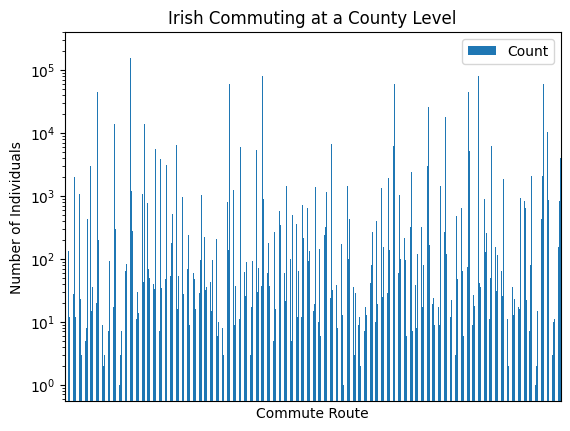

In [42]:
# ax = commute_county_df.plot.bar(x='County_commute', y='Count', rot=30)
# plt.xticks([])  
# ax.set_yscale('log')
# plt.title("Irish Commuting at a County Level")
# plt.xlabel("Commute Route")
# plt.ylabel("Number of Individuals")
# plt.savefig("County_commute")
# plt.show()

In [56]:
ordered_commute_county_df = commute_county_df.sort_values(by=['Count'], ascending=False)
ordered_commute_county_df

,County_commute,County_Origin,County_Destination,Count
215,Dublin City-Dublin City,Dublin City,Dublin City,218860
143,Cork County-Cork County,Cork County,Cork County,156717
287,Fingal-Fingal,Fingal,Fingal,91167
574,Limerick City and County-Limerick City and County,Limerick City and County,Limerick City and County,85643
900,South Dublin-South Dublin,South Dublin,South Dublin,80723
...,...,...,...,...
398,Kerry-Leitrim,Kerry,Leitrim,1
1024,Wexford-Leitrim,Wexford,Leitrim,1
294,Fingal-Leitrim,Fingal,Leitrim,1
1035,Wexford-Roscommon,Wexford,Roscommon,1


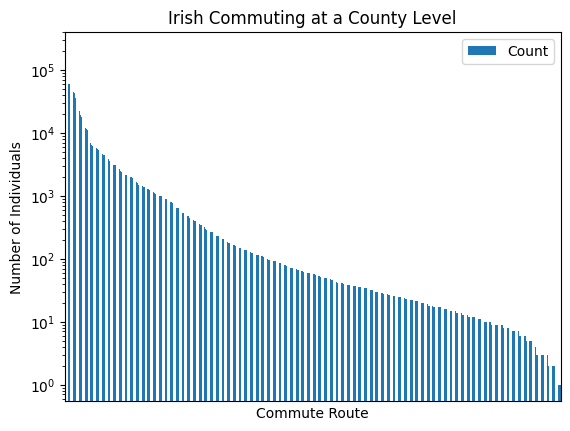

In [57]:
# ax = ordered_commute_county_df.plot.bar(x='County_commute', y='Count', rot=30)
# plt.xticks([])  
# ax.set_yscale('log')
# plt.title("Irish Commuting at a County Level")
# plt.xlabel("Commute Route")
# plt.ylabel("Number of Individuals")
# plt.savefig("County_commute_ordered")
# plt.show()

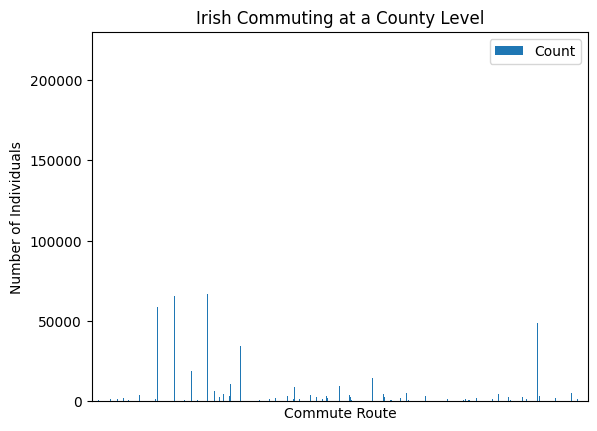

In [43]:
# #This graph is not scaled by log
# ax = commute_county_df.plot.bar(x='County_commute', y='Count', rot=30)
# plt.xticks([])  
# plt.title("Irish Commuting at a County Level")
# plt.xlabel("Commute Route")
# plt.ylabel("Number of Individuals")
# plt.show()

In [58]:
#There is some lost data due to the locations - Northern Ireland, Work/school from home, Overseas, No fixed place of work'
final_commute_df = pd.merge(commute_county_df,commute_coords_df, on='County_commute') 

In [59]:
final_commute_df =  final_commute_df[['Count', 'latitude_origin', 'longitude_origin', 'latitude_destination', 'longitude_destination']]

In [60]:
final_commute_df


,Count,latitude_origin,longitude_origin,latitude_destination,longitude_destination
0,19174,52.7181,-6.8509,52.7181,-6.8509
1,8,52.7181,-6.8509,53.9908,-7.3600
2,3,52.7181,-6.8509,52.8077,-9.4218
3,40,52.7181,-6.8509,51.8969,-8.4863
4,39,52.7181,-6.8509,51.9943,-8.7287
...,...,...,...,...,...
950,30,52.9750,-6.0498,52.4739,-7.9221
951,152,52.9750,-6.0498,52.2593,-7.1101
952,52,52.9750,-6.0498,53.5267,-7.3389
953,833,52.9750,-6.0498,52.3369,-6.4633


In [48]:
# import folium  

# # Initialize map centered at a certain point
# map_center = [ 53.349805, -6.26031]  # Coordinates for Ireland
# map_zoom = 6
# mymap = folium.Map(location=map_center, zoom_start=map_zoom)

# # Add markers for each journey
# for index, row in final_commute_df.iterrows():
#     folium.Marker([row['latitude_origin'], row['longitude_origin']]).add_to(mymap)
#     folium.Marker([row['latitude_destination'], row['longitude_destination']]).add_to(mymap)

# # Save the map to an HTML file
# mymap.save("journeys_map.html")

In [49]:
# import folium  

# # Initialize map centered at a certain point
# map_center = [ 53.349805, -6.26031]  # Coordinates for Ireland
# map_zoom = 8
# mymap = folium.Map(location=map_center, zoom_start=map_zoom)

# # Add flows between origin and destination for each journey
# for index, row in final_commute_df.iterrows():
#     origin = [row['latitude_origin'], row['longitude_origin']]
#     dest = [row['latitude_destination'], row['longitude_destination']]
#     flow_line = folium.PolyLine(locations=[origin, dest], weight=row['Count']/10000, color='blue')
#     mymap.add_child(flow_line)

# # Save the map to an HTML file
# mymap.save("flow_map.html")

## Electoral Division

In [35]:
data_ed

,RESIDENCE_ED_GUID,RESIDENCE_CSOED,RESIDENCE_CSOED_LABEL,RESIDENCE_COUNTY,RESIDENCE_COUNTY_LABEL,POWSC_ED_GUID,POWSC_CSOED,POWSC_CSOED_LABEL,POWSC_COUNTY,POWSC_COUNTY_LABEL,COUNT
0,2AE19629185813A3E055000000000001,ed3409_01001,Carlow Urban,CW,Carlow,2AE19629185813A3E055000000000001,ed3409_01001,Carlow Urban,CW,Carlow,680
1,2AE19629185813A3E055000000000001,ed3409_01001,Carlow Urban,CW,Carlow,2AE196291A5913A3E055000000000001,ed3409_01002,Graigue Urban,CW,Carlow,12
2,2AE19629185813A3E055000000000001,ed3409_01001,Carlow Urban,CW,Carlow,2AE19629187F13A3E055000000000001,ed3409_01004,Hacketstown,CW,Carlow,8
3,2AE19629185813A3E055000000000001,ed3409_01001,Carlow Urban,CW,Carlow,2AE19629183613A3E055000000000001,ed3409_01011,Agha,CW,Carlow,2
4,2AE19629185813A3E055000000000001,ed3409_01001,Carlow Urban,CW,Carlow,2AE19629183713A3E055000000000001,ed3409_01012,Ballinacarrig,CW,Carlow,10
...,...,...,...,...,...,...,...,...,...,...,...
291888,2AE196291AD013A3E055000000000001,ed3409_34070,Tullycorbet,MN,Monaghan,2AE196291ACF13A3E055000000000001,ed3409_34069,Tehallan,MN,Monaghan,1
291889,2AE196291AD013A3E055000000000001,ed3409_34070,Tullycorbet,MN,Monaghan,2AE196291AD013A3E055000000000001,ed3409_34070,Tullycorbet,MN,Monaghan,9
291890,2AE196291AD013A3E055000000000001,ed3409_34070,Tullycorbet,MN,Monaghan,NaN,M,No fixed place of work,M,No fixed place of work,24
291891,2AE196291AD013A3E055000000000001,ed3409_34070,Tullycorbet,MN,Monaghan,NaN,NI,Northern Ireland,NI,Northern Ireland,7


In [36]:
#Rename Columns and check that all commuting rows are unique
data_ED = data.rename(columns={"RESIDENCE_CSOED_LABEL": "ED_Origin", "POWSC_CSOED_LABEL": "ED_Destination", "COUNT": "Count"})
data_ED["ED_Commute"] = data_ED['ED_Origin'].astype(str) +"-"+ data_ED["ED_Destination"]

In [37]:
print(len(data_ED['ED_Commute'].unique()))
print(len(data_ED.index))

287116
291893


In [38]:
#There is a difference thus there must be some commutes that need to be combined - 4777
291893 - 287116

4777

In [39]:
#Can do a group-by 
data_ED = data_ED[['ED_Origin', 'ED_Destination', 'ED_Commute', 'Count']]


In [40]:
commute_ED_df = data_ED.groupby(['ED_Commute','ED_Origin', 'ED_Destination']).sum().reset_index()
commute_ED_df

,ED_Commute,ED_Origin,ED_Destination,Count
0,Abbey A-Abbey A,Abbey A,Abbey A,553
1,Abbey A-Abbey B,Abbey A,Abbey B,36
2,Abbey A-Abbey C,Abbey A,Abbey C,38
3,Abbey A-Abbey D,Abbey A,Abbey D,27
4,Abbey A-Adare South,Abbey A,Adare South,2
...,...,...,...,...
287111,Árainn-Sligo North,Árainn,Sligo North,2
287112,Árainn-Templeogue-Kimmage Manor,Árainn,Templeogue-Kimmage Manor,1
287113,Árainn-Westport Urban,Árainn,Westport Urban,1
287114,Árainn-Work/school from home,Árainn,Work/school from home,50


In [41]:
commute_ED_df

,ED_Commute,ED_Origin,ED_Destination,Count
0,Abbey A-Abbey A,Abbey A,Abbey A,553
1,Abbey A-Abbey B,Abbey A,Abbey B,36
2,Abbey A-Abbey C,Abbey A,Abbey C,38
3,Abbey A-Abbey D,Abbey A,Abbey D,27
4,Abbey A-Adare South,Abbey A,Adare South,2
...,...,...,...,...
287111,Árainn-Sligo North,Árainn,Sligo North,2
287112,Árainn-Templeogue-Kimmage Manor,Árainn,Templeogue-Kimmage Manor,1
287113,Árainn-Westport Urban,Árainn,Westport Urban,1
287114,Árainn-Work/school from home,Árainn,Work/school from home,50


In [42]:
#Save csv
commute_ED_df.to_csv('commute_ed_level', sep=',', index=False, encoding='utf-8')

In [43]:
# ax = commute_ED_df.plot.bar(x='ED_Commute', y='Count', rot=30)
# plt.xticks([])  
# ax.set_yscale('log')
# plt.title("Irish Commuting at a Electoral Division Level")
# plt.xlabel("Commute Route")
# plt.ylabel("Number of Individuals")
# plt.savefig("ED_commute")
# plt.show()

In [44]:
ordered_commute_ED_df = commute_ED_df.sort_values(by=['Count'], ascending=False)
ordered_commute_ED_df

,ED_Commute,ED_Origin,ED_Destination,Count
216172,Navan Rural-Navan Rural,Navan Rural,Navan Rural,5871
47900,Blanchardstown-Blakestown-Blanchardstown-Blake...,Blanchardstown-Blakestown,Blanchardstown-Blakestown,5768
215447,Naas Urban-Naas Urban,Naas Urban,Naas Urban,5594
201794,Maynooth-Maynooth,Maynooth,Maynooth,4477
80021,Clenagh-Clenagh,Clenagh,Clenagh,4459
...,...,...,...,...
130441,Fermoy Urban-Churchfield,Fermoy Urban,Churchfield,1
130442,Fermoy Urban-City Hall A,Fermoy Urban,City Hall A,1
130444,Fermoy Urban-Clogheen,Fermoy Urban,Clogheen,1
130445,Fermoy Urban-Clonakilty Urban,Fermoy Urban,Clonakilty Urban,1


In [45]:
# ax = ordered_commute_ED_df.plot.bar(x='ED_Commute', y='Count', rot=30)
# plt.xticks([])  
# ax.set_yscale('log')
# plt.title("Irish Commuting at a Electoral Division Level")
# plt.xlabel("Commute Route")
# plt.ylabel("Number of Individuals")
# plt.savefig("ED_commute_ordered")
# plt.show()

In [46]:
origins = data["RESIDENCE_CSOED_LABEL"].unique()
destinations = data["POWSC_CSOED_LABEL"].unique()

In [52]:
# Generate permutations
permutations = list(itertools.product(origins, destinations))

# Create DataFrame
all_commutes_ED_df = pd.DataFrame(permutations, columns=['Origin_ED', 'Destination_ED'])

# Create 'County_commute' column by concatenating 'Origin' and 'Destination' with '-'
all_commutes_ED_df['ED_Commute'] = all_commutes_ED_df['Origin_ED'] + '-' + all_commutes_ED_df['Destination_ED']

# Create 'count' column with all 0s
all_commutes_ED_df['Count_Zero'] = 0

# Merge datasets
all_commutes_ED_df = pd.merge(all_commutes_ED_df, commute_ED_df, on='ED_Commute', how='left')

all_commutes_ED_df['EDCommute_Count'] = all_commutes_ED_df['Count_Zero'] + all_commutes_ED_df['Count']
all_commutes_ED_df = all_commutes_ED_df[['ED_Commute', 'Origin_ED', 'Destination_ED', 'EDCommute_Count']]

all_commutes_ED_df


,ED_Commute,Origin_ED,Destination_ED,EDCommute_Count
0,Carlow Urban-Carlow Urban,Carlow Urban,Carlow Urban,680.0
1,Carlow Urban-Graigue Urban,Carlow Urban,Graigue Urban,12.0
2,Carlow Urban-Hacketstown,Carlow Urban,Hacketstown,8.0
3,Carlow Urban-Agha,Carlow Urban,Agha,2.0
4,Carlow Urban-Ballinacarrig,Carlow Urban,Ballinacarrig,10.0
...,...,...,...,...
8699653,Tullycorbet-Fánaid Thiar,Tullycorbet,Fánaid Thiar,NaN
8699654,Tullycorbet-Loch Caol,Tullycorbet,Loch Caol,NaN
8699655,Tullycorbet-Feddyglass,Tullycorbet,Feddyglass,NaN
8699656,Tullycorbet-Drummully,Tullycorbet,Drummully,NaN


In [53]:
all_commutes_ED_df = all_commutes_ED_df.fillna(0)
all_commutes_ED_df

,ED_Commute,Origin_ED,Destination_ED,EDCommute_Count
0,Carlow Urban-Carlow Urban,Carlow Urban,Carlow Urban,680.0
1,Carlow Urban-Graigue Urban,Carlow Urban,Graigue Urban,12.0
2,Carlow Urban-Hacketstown,Carlow Urban,Hacketstown,8.0
3,Carlow Urban-Agha,Carlow Urban,Agha,2.0
4,Carlow Urban-Ballinacarrig,Carlow Urban,Ballinacarrig,10.0
...,...,...,...,...
8699653,Tullycorbet-Fánaid Thiar,Tullycorbet,Fánaid Thiar,0.0
8699654,Tullycorbet-Loch Caol,Tullycorbet,Loch Caol,0.0
8699655,Tullycorbet-Feddyglass,Tullycorbet,Feddyglass,0.0
8699656,Tullycorbet-Drummully,Tullycorbet,Drummully,0.0


In [54]:
#Save csv
all_commutes_ED_df.to_csv('commute_ed_level_all', sep=',', index=False, encoding='utf-8')

In [ ]:
num_origins = len(origins)
num_destinations = len(destinations)

In [ ]:
print(num_origins)
print(num_destinations)

3126
2783


In [79]:
33126*2783

8699658